## Cifar - 10 Image Classification - v1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

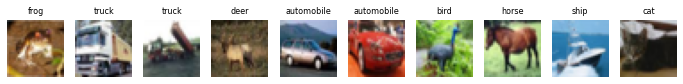

In [6]:
plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i]), plt.axis('off')
    plt.title(class_names[y_train[i,0]], fontsize=8)
plt.show()

In [7]:
# X_data: scaling
X_train = X_train/255.
X_test = X_test/255.

In [8]:
# y_data: one hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

#### Modeling

In [10]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

model = Sequential([ 
    Conv2D(32, (3,3), input_shape=X_train.shape[1:], padding='same', activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [11]:
model.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss='categorical_crossentropy', metrics=['accuracy']
)

In [12]:
model_path = './models/best-cifar10-v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [13]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=100, batch_size=32, callbacks=[mc, es]
)

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 1.8271 - accuracy: 0.3280
Epoch 00001: val_loss improved from inf to 1.57307, saving model to ./models\best-cifar10-v1.h5
1250/1250 [==============================] - 11s 7ms/step - loss: 1.8271 - accuracy: 0.3280 - val_loss: 1.5731 - val_accuracy: 0.4272
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 1.5212 - accuracy: 0.4430
Epoch 00002: val_loss improved from 1.57307 to 1.38124, saving model to ./models\best-cifar10-v1.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5212 - accuracy: 0.4430 - val_loss: 1.3812 - val_accuracy: 0.5054
Epoch 3/100
1243/1250 [============================>.] - ETA: 0s - loss: 1.3960 - accuracy: 0.4945
Epoch 00003: val_loss improved from 1.38124 to 1.27256, saving model to ./models\best-cifar10-v1.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3955 - accuracy: 0.4949 - val_loss: 1.2726 - val_accuracy: 0.5550
Epoch 4

In [14]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6719 - accuracy: 0.7792


[0.6719446778297424, 0.77920001745224]

In [15]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

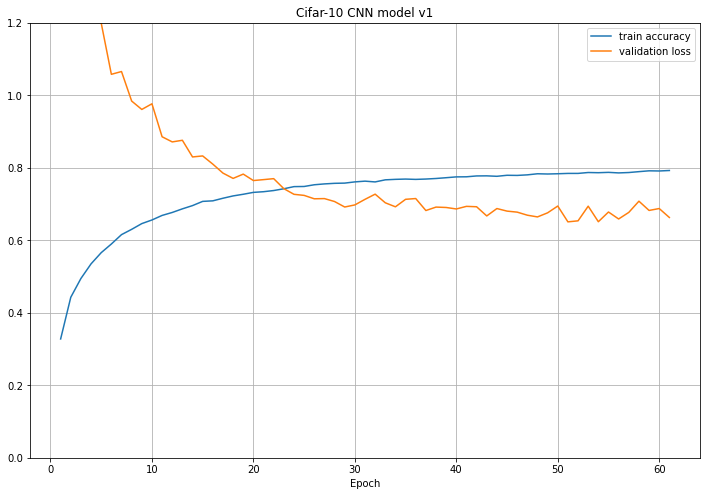

In [16]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.ylim(0,1.2),
plt.xlabel('Epoch')
plt.title('Cifar-10 CNN model v1')
plt.show()

## Cifat - 10 Image Classification - v2
- Data Argumentation

In [18]:
model = Sequential([ 
    Conv2D(32, (3,3), input_shape=X_train.shape[1:], padding='same', activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

In [19]:
model.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss='categorical_crossentropy', metrics=['accuracy']
)

In [20]:
model_path = './models/best-cifar10-v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X_train, Y_train, stratify=Y_train, test_size=0.2, random_state=seed
)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,          # randomly rotate images in the range 15 degree
    width_shift_range=0.1,      # randomly shift images horizontally 
    height_shift_range=0.1,     # randomly shift images vertically
    shear_range=0.1,            # 도형의 기울기
    zoom_range=[0.8,1.2],       # 0.8~1.2 배 크기로 임의로 확대/축소
    horizontal_flip=True,       # randomly flip images
    vertical_flip=False,        # randomly flip images
    fill_mode='nearest'         # set mode for filling points outside the input boundaries
)

In [23]:
datagen.fit(X_train)

In [25]:
hist = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    validation_data=(X_valid, Y_valid),
    epochs=100, callbacks=[mc, es]
)

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 1.8397 - accuracy: 0.3315
Epoch 00001: val_loss improved from inf to 1.61233, saving model to ./models\best-cifar10-v2.h5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.8397 - accuracy: 0.3315 - val_loss: 1.6123 - val_accuracy: 0.4173
Epoch 2/100
1247/1250 [============================>.] - ETA: 0s - loss: 1.6300 - accuracy: 0.4068
Epoch 00002: val_loss improved from 1.61233 to 1.44754, saving model to ./models\best-cifar10-v2.h5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.6296 - accuracy: 0.4069 - val_loss: 1.4475 - val_accuracy: 0.4854
Epoch 3/100
1249/1250 [============================>.] - ETA: 0s - loss: 1.5318 - accuracy: 0.4445
Epoch 00003: val_loss improved from 1.44754 to 1.39532, saving model to ./models\best-cifar10-v2.h5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.5316 - accuracy: 0.4446 - val_loss: 1.3953 - val_accuracy: 0.4958
Ep

In [26]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7406 - accuracy: 0.7504


[0.7405771017074585, 0.7504000067710876]

In [27]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

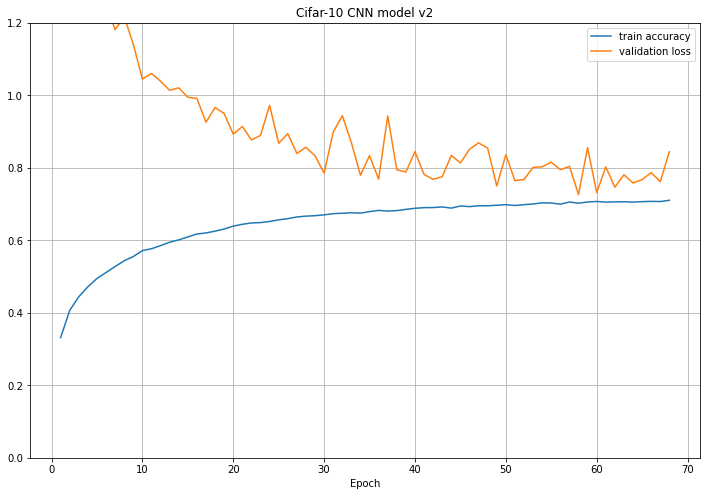

In [28]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.ylim(0,1.2),
plt.xlabel('Epoch')
plt.title('Cifar-10 CNN model v2')
plt.show()

## Cifar - 10 Image Classification - v3
- Data Argumentation
- Hyper Parameter Change

In [29]:
model = Sequential([ 
    Conv2D(32, (3,3), input_shape=X_train.shape[1:], padding='same', activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [30]:
model.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss='categorical_crossentropy', metrics=['accuracy']
)

In [31]:
model_path = './models/best-cifar10-v3.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,   # set input mean to 0 over the dataset
    samplewise_center=False,    # set each sample mean to 0
    featurewise_std_normalization=False,    # divide inputs by std of dataset
    samplewise_std_normalization=False,     # divide each input by its std
    zca_whitening=False,    # apply ZCA whitening
    zca_epsilon=1e-06,      # epsilon for ZCA whitening
    rotation_range=0,       # randomly rotate images in the range (deg 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally
    height_shift_range=0.1, # randomly shift images vertically
    shear_range=0.,         # set range for random shear
    zoom_range=0.1,         # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    fill_mode='nearest',    # set mode for filling points outside the input boundaries
    cval=0.,                # value used for fill_mode = "constant"
    horizontal_flip=True,   # randomly flip images
    vertical_flip=False,    # randomly flip images
    rescale=None,           # set rescaling factor (applied before any other transformation)
    preprocessing_function=None,    # set function that will be applied on each input
    data_format=None,       # image data format, either "channels_first" or "channels_last"
    validation_split=0.0    # fraction of images reserved for validation
)

In [33]:
datagen.fit(X_train)

In [34]:
hist = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    validation_data=(X_valid, Y_valid),
    epochs=100, callbacks=[mc, es]
)

Epoch 1/100
1248/1250 [============================>.] - ETA: 0s - loss: 1.9451 - accuracy: 0.2820
Epoch 00001: val_loss improved from inf to 1.66519, saving model to ./models\best-cifar10-v3.h5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.9451 - accuracy: 0.2819 - val_loss: 1.6652 - val_accuracy: 0.4088
Epoch 2/100
1249/1250 [============================>.] - ETA: 0s - loss: 1.6628 - accuracy: 0.3941
Epoch 00002: val_loss improved from 1.66519 to 1.50654, saving model to ./models\best-cifar10-v3.h5
1250/1250 [==============================] - 14s 11ms/step - loss: 1.6628 - accuracy: 0.3942 - val_loss: 1.5065 - val_accuracy: 0.4617
Epoch 3/100
1250/1250 [==============================] - ETA: 0s - loss: 1.5450 - accuracy: 0.4358
Epoch 00003: val_loss improved from 1.50654 to 1.38805, saving model to ./models\best-cifar10-v3.h5
1250/1250 [==============================] - 14s 11ms/step - loss: 1.5450 - accuracy: 0.4358 - val_loss: 1.3880 - val_accuracy: 0.5005
Ep

In [35]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7479 - accuracy: 0.7491


[0.747911274433136, 0.7491000294685364]

In [36]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

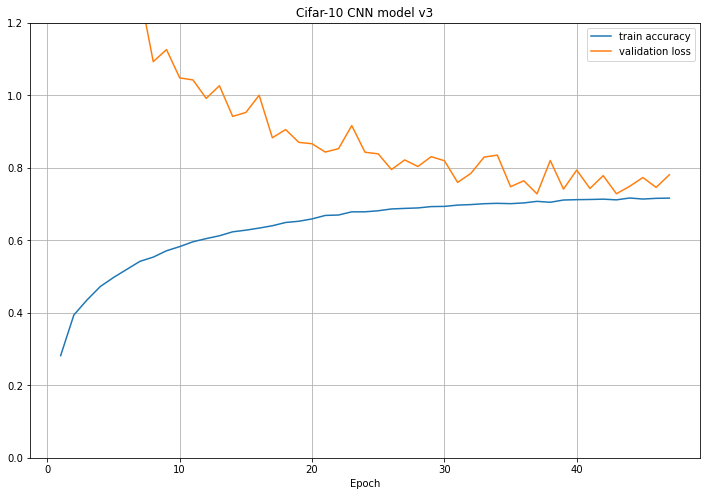

In [37]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.ylim(0,1.2),
plt.xlabel('Epoch')
plt.title('Cifar-10 CNN model v3')
plt.show()